In [54]:
import dynamiqs as dq
import jax
import jax.numpy as jnp # the JAX version of numpy
from matplotlib import pyplot as plt
import scipy



In [31]:
jax.devices()
dq.set_device('cpu')

dq.set_precision('simple')

In [47]:
#CODE for comparison -- 1.1
na = 20
nb = 5
g2 = 1 #chlling
eps = -4
Kb = 10
T = 3
tsave = jnp.linspace(0, T, 50)

a, b = dq.destroy(na, nb)

H = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) + jnp.conj(eps) * b + eps * dq.dag(b)# Hamiltonian

#initial state and save time
psi0 = dq.fock((na,nb), (0,0))  # coherent state

jump_ops = [jnp.sqrt(Kb)*b]
res_2_mode = dq.mesolve(H,jump_ops, psi0, tsave)


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|██████████| 100.0% ◆ elapsed 121.81ms ◆ remaining 0.00ms 


In [48]:
# parameters
na = 20  # number of Fock states
nb = 5 
T = 3 # time of evolution
omega = jnp.pi/T  # detuning2=1
Kb = 10
g2 = 1

In [62]:
def optimize(values):
    # operators
    a, b = dq.destroy(na, nb)

    H_0 = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) 

    times = [0.0, 1, 2.0, 3.0]
    qarray = b + dq.dag(b)
    H_d = dq.pwc(times, values, qarray)

    H = H_0 + H_d

    # initial state and save time
    psi0 = dq.fock((na,nb), (0,0))  # coherent state
    t_save = jnp.linspace(0, T, 50)  # save times

    jump_ops = [jnp.sqrt(Kb)*b]
    res = dq.mesolve(H,jump_ops, psi0, t_save)

    trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a

    dq.plot.wigner_gif(trace_a, fps=120)
    trace_a_2mode = dq.ptrace(res_2_mode.states, 0,res_2_mode.states.dims) # trace of a
    trace_a = dq.ptrace(res.states, 0,res.states.dims) # trace of a
    fidelity_plot = dq.fidelity(trace_a, trace_a_2mode)
    for t in range(50):
        if tsave[t]>1 and fidelity_plot[t]>0.995:
            print(tsave[t])
            print(values)
            return(tsave[t])

    # dq.plot.wigner_gif(res.states)
    return(3)
values = [-10.0, -6.0, -4.0]
xopt = scipy.optimize.fmin(optimize, values, xtol=1e-2, disp=True)
print(xopt)

|██████████| 100.0% ◆ elapsed 150.92ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 33.44it/s]


2.877551
[-10.  -6.  -4.]


|██████████| 100.0% ◆ elapsed 150.94ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.39it/s]


2.8163266
[-10.5  -6.   -4. ]


|██████████| 100.0% ◆ elapsed 157.16ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:03<00:00, 14.68it/s]


2.877551
[-10.   -6.3  -4. ]


|██████████| 100.0% ◆ elapsed 162.07ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 34.04it/s]


2.877551
[-10.   -6.   -4.2]


|██████████| 100.0% ◆ elapsed 156.37ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 29.38it/s]
|██████████| 100.0% ◆ elapsed 154.90ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 34.45it/s]


2.877551
[-10.08333333  -6.05        -4.1       ]


|██████████| 100.0% ◆ elapsed 153.62ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.05it/s]


2.877551
[-10.25  -6.    -4.  ]


|██████████| 100.0% ◆ elapsed 156.30ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 34.53it/s]


2.877551
[-10.25  -6.15  -4.  ]


|██████████| 100.0% ◆ elapsed 156.46ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 28.47it/s]


2.877551
[-10.25  -6.    -4.1 ]


|██████████| 100.0% ◆ elapsed 156.52ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.05it/s]


2.9387755
[-10.41666667  -6.1         -3.9       ]


|██████████| 100.0% ◆ elapsed 154.46ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 34.87it/s]


2.877551
[-10.29166667  -6.025       -4.05      ]


|██████████| 100.0% ◆ elapsed 155.12ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.11it/s]


2.8163266
[-10.375  -6.     -4.   ]


|██████████| 100.0% ◆ elapsed 156.21ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 26.95it/s]


2.8163266
[-10.375  -6.075  -4.   ]


|██████████| 100.0% ◆ elapsed 155.62ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 34.66it/s]


2.8163266
[-10.375  -6.     -4.05 ]


|██████████| 100.0% ◆ elapsed 149.11ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.07it/s]


2.877551
[-10.45833333  -6.05        -3.95      ]


|██████████| 100.0% ◆ elapsed 154.93ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 34.79it/s]


2.8163266
[-10.39583333  -6.0125      -4.025     ]


|██████████| 100.0% ◆ elapsed 137.53ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.36it/s]


2.8163266
[-10.4375  -6.      -4.    ]


|██████████| 100.0% ◆ elapsed 150.01ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 26.17it/s]


2.8163266
[-10.4375  -6.0375  -4.    ]


|██████████| 100.0% ◆ elapsed 148.68ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.55it/s]


2.8163266
[-10.4375  -6.      -4.025 ]


|██████████| 100.0% ◆ elapsed 151.50ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.39it/s]


2.8163266
[-10.47916667  -6.025       -3.975     ]


|██████████| 100.0% ◆ elapsed 143.57ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.35it/s]


2.8163266
[-10.44791667  -6.00625     -4.0125    ]


|██████████| 100.0% ◆ elapsed 151.87ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.36it/s]


2.8163266
[-10.46875  -6.       -4.     ]


|██████████| 100.0% ◆ elapsed 146.16ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 25.17it/s]


2.8163266
[-10.46875  -6.01875  -4.     ]


|██████████| 100.0% ◆ elapsed 151.75ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.10it/s]


2.8163266
[-10.46875  -6.       -4.0125 ]


|██████████| 100.0% ◆ elapsed 150.99ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.41it/s]


2.8163266
[-10.48958333  -6.0125      -3.9875    ]


|██████████| 100.0% ◆ elapsed 151.15ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.17it/s]


2.8163266
[-10.47395833  -6.003125    -4.00625   ]


|██████████| 100.0% ◆ elapsed 148.22ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.41it/s]


2.8163266
[-10.484375  -6.        -4.      ]


|██████████| 100.0% ◆ elapsed 143.76ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.59it/s]


2.8163266
[-10.484375  -6.009375  -4.      ]


|██████████| 100.0% ◆ elapsed 148.84ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.24it/s]


2.8163266
[-10.484375  -6.        -4.00625 ]


|██████████| 100.0% ◆ elapsed 147.80ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.19it/s]


2.8163266
[-10.49479167  -6.00625     -3.99375   ]


|██████████| 100.0% ◆ elapsed 148.63ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:02<00:00, 23.78it/s]


2.8163266
[-10.48697917  -6.0015625   -4.003125  ]


|██████████| 100.0% ◆ elapsed 157.29ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.27it/s]


2.8163266
[-10.4921875  -6.         -4.       ]


|██████████| 100.0% ◆ elapsed 141.12ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.70it/s]


2.8163266
[-10.4921875  -6.0046875  -4.       ]


|██████████| 100.0% ◆ elapsed 150.68ms ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:01<00:00, 35.33it/s]


2.8163266
[-10.4921875  -6.         -4.003125 ]
Optimization terminated successfully.
         Current function value: 2.816327
         Iterations: 7
         Function evaluations: 34
[-10.5  -6.   -4. ]


(50,)


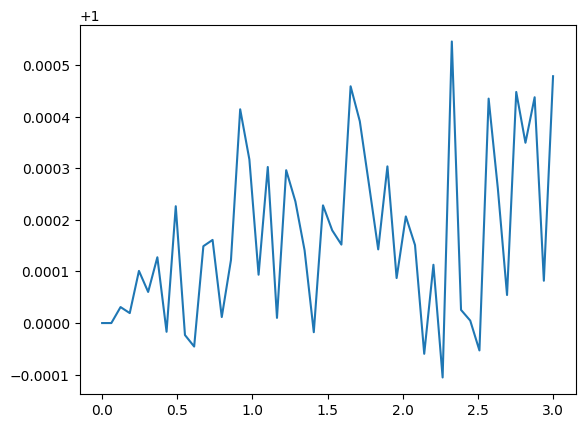